**Assignment 4 - Design and train a Convolutional Neural Network model for CIFAR-10 Dataset**

**Author** - Snehal Utage

**ZID** - Z1888637

In [ ]:
#LOAD CIFAR-10 Dataset

#Import the required modules
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from keras import datasets, layers, models
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten,Activation
import time
from keras import regularizers
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping

# Load dataset
(x_train,y_train),(x_test,y_test) = datasets.cifar10.load_data()

#Print the details of the dataset - Training and testing set details
print("Training Set (images) shape : ",x_train.shape)
print("Training Set (labels) shape : ",y_train.shape)
print("\nTesting Set (images) shape : ",x_test.shape)
print("Testing Set (labels) shape : ",y_test.shape)

# Find the unique numbers (classes) from the train labels
classes = np.unique(y_train)
num_classes = len(classes)
print("\nTotal number of outputs : ", num_classes)
print("Output classes : ", classes)

testing_features = x_test
testing_labels = y_test

Training Set (images) shape :  (50000, 32, 32, 3)
Training Set (labels) shape :  (50000, 1)

Testing Set (images) shape :  (10000, 32, 32, 3)
Testing Set (labels) shape :  (10000, 1)

Total number of outputs :  10
Output classes :  [0 1 2 3 4 5 6 7 8 9]


First few Training images and their labels: [6, 9, 9, 4, 1, 1, 2, 7, 8, 3, 4, 7, 7, 2, 9, 9, 9, 3, 2, 6, 4, 3, 6, 6, 2, 6, 3, 5, 4, 0, 0, 9, 1, 3, 4, 0]
Training Image of each class:


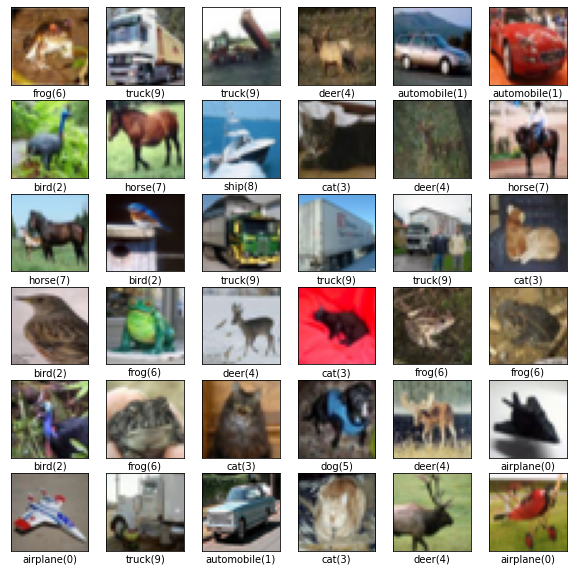

In [ ]:
#VISUALIZE SAMPLES OF THE DATASET 

#Visualize one image of each class
#Class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']

#Print first 36 samples that covers all the images of each class
print("First few Training images and their labels: " + str([label[0] for label in y_train[0:36]])) 
print("Training Image of each class:")

#Plot the images for each class
plt.figure(figsize=(10,10))
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    labels=class_names[y_train[i][0]]+ "("+ str(y_train[i][0])+")"
    plt.xlabel(labels)
plt.show()

In [ ]:
#DESIGN CNN MODEL

#DATA PREPROCESSING - Normalization
#Convert the labels to one hot encode values
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

#Convert integer to float
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

#Normalize to range 0-1
x_train = x_train/255.0
x_test = x_test/255.0

#Data Augmentation - Rotate images and flip it horizontally
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    )
datagen.fit(x_train)

#Early Stop - To stop execution if the validation loss does not reduce, patience =50
earlystop = EarlyStopping(monitor='val_loss',min_delta=0.0001, patience=50,mode='min')
callbacks_list = [earlystop]

#CREATE MODEL 
#Set the Hyperparameters
epochs = 200
batch_size = 512
learning_rate = 0.001
weight_decay = 0.0001
num_classes = 10

#Set the optimizer - Adam(default LR = 0.001)
opt = tf.keras.optimizers.Adam(learning_rate = learning_rate)

#Create model
model = Sequential()
#Add the different layers to model
#Convolutional layer - 1
model.add(Conv2D(64, kernel_size=(3,3), padding='same',kernel_initializer="he_uniform", kernel_regularizer=regularizers.l2(weight_decay),input_shape=(32, 32, 3)))
model.add(BatchNormalization())
model.add(LeakyReLU(0.1))
#model.add(Activation("relu")) ##Commented to test with different activations

#Convolutional layer - 2
model.add(Conv2D(64, kernel_size=(3,3),kernel_initializer="he_uniform", kernel_regularizer=regularizers.l2(weight_decay), padding='same'))
model.add(BatchNormalization())
model.add(LeakyReLU(0.1))
#model.add(Activation("relu"))

#Pooling and dropout
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.1))

#Convolutional layer - 3
model.add(Conv2D(128, kernel_size=(3,3), kernel_initializer="he_uniform", kernel_regularizer=regularizers.l2(weight_decay), padding='same'))
model.add(BatchNormalization())
model.add(LeakyReLU(0.1))
#model.add(Activation("relu"))

#Convolutional layer - 4
model.add(Conv2D(128, kernel_size=(3,3), kernel_initializer="he_uniform",kernel_regularizer=regularizers.l2(weight_decay),padding='same'))
model.add(BatchNormalization())
model.add(LeakyReLU(0.1))
#model.add(Activation("relu"))

#Pooling and dropout
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))

#Convolutional layer - 5
model.add(Conv2D(192, kernel_size=(3,3), kernel_initializer="he_uniform", kernel_regularizer=regularizers.l2(weight_decay), padding='same'))
model.add(BatchNormalization())
model.add(LeakyReLU(0.1))
#model.add(Activation("relu"))

#Convolutional layer - 6 
model.add(Conv2D(192, kernel_size=(3,3), kernel_initializer="he_uniform", kernel_regularizer=regularizers.l2(weight_decay), padding='same'))
model.add(BatchNormalization())
model.add(LeakyReLU(0.1))
#model.add(Activation("relu"))

#Pooling and dropout
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.3))

#Flatten output of convolutional layers
model.add(Flatten())

#Add hidden layers - Fully connected Layers/Dense
model.add(Dense(512))
model.add(BatchNormalization())
model.add(LeakyReLU(0.1))
#model.add(Activation("relu"))
model.add(Dropout(0.4))

model.add(Dense(128))
model.add(BatchNormalization())
model.add(LeakyReLU(0.1))
#model.add(Activation("relu"))
model.add(Dropout(0.4))

#Output layer(number of classes = 10)
model.add(Dense(num_classes, activation='softmax'))


#COMPILE MODEL
#compiling the sequential model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=opt)


#MODEL SUMMARY - To get the model details
model.summary()


Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_30 (Conv2D)           (None, 32, 32, 64)        1792      
_________________________________________________________________
batch_normalization_40 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
leaky_re_lu_16 (LeakyReLU)   (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 32, 32, 64)        36928     
_________________________________________________________________
batch_normalization_41 (Batc (None, 32, 32, 64)        256       
_________________________________________________________________
leaky_re_lu_17 (LeakyReLU)   (None, 32, 32, 64)        0         
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 16, 16, 64)       

In [ ]:
#TRAIN MODEL & EVALUATE MODEL

#To track the time model takes to train
start = time.time()
#Training the model for number of epochs
history=model.fit(datagen.flow(x_train, y_train, batch_size=batch_size), steps_per_epoch=x_train.shape[0] // batch_size,epochs=epochs,\
                    callbacks=callbacks_list,verbose=1,validation_data=(x_test,y_test))
end = time.time()
print("\nModel took time for training : {:.2f} minutes".format((end - start)/60))


#EVALUATE THE TRAINED MODEL
test_eval = model.evaluate(x_test, y_test, verbose=0)
print("\nTest loss : ", test_eval[0])
print("Test accuracy : ", test_eval[1])

Epoch 1/200
97/97 [==============================] - 31s 320ms/step - loss: 1.9221 - accuracy: 0.3755 - val_loss: 1.7397 - val_accuracy: 0.4385
Epoch 2/200
97/97 [==============================] - 31s 316ms/step - loss: 1.4544 - accuracy: 0.5302 - val_loss: 1.4306 - val_accuracy: 0.5456
Epoch 3/200
97/97 [==============================] - 31s 315ms/step - loss: 1.2424 - accuracy: 0.6112 - val_loss: 1.1665 - val_accuracy: 0.6465
Epoch 4/200
97/97 [==============================] - 31s 315ms/step - loss: 1.1194 - accuracy: 0.6561 - val_loss: 1.0765 - val_accuracy: 0.6771
Epoch 5/200
97/97 [==============================] - 30s 314ms/step - loss: 1.0331 - accuracy: 0.6910 - val_loss: 1.0513 - val_accuracy: 0.6939
Epoch 6/200
97/97 [==============================] - 31s 315ms/step - loss: 0.9669 - accuracy: 0.7145 - val_loss: 1.0006 - val_accuracy: 0.7103
Epoch 7/200
97/97 [==============================] - 31s 315ms/step - loss: 0.9118 - accuracy: 0.7324 - val_loss: 1.1242 - val_accuracy:

Epochs - 200, Learning Rate - 0.001, Batch_size - 512



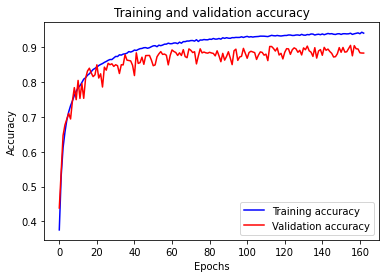

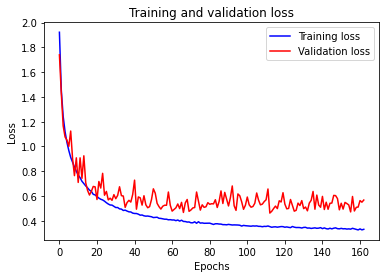

In [ ]:
#PLOT THE ACCURACY & LOSS GRAPHS

print("Epochs - {0}, Learning Rate - {1}, Batch_size - {2}\n".format(epochs,learning_rate,batch_size))

#Get the accuracy and the loss from the trained model
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

#Plot the accuracy
plt.plot(accuracy,color='blue', label='Training accuracy')
plt.plot(val_accuracy,color='red',label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.figure()

#Plot the loss
plt.plot(loss,color='blue', label='Training loss')
plt.plot(val_loss, color='red', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
#TEST THE MODEL
from sklearn.metrics import confusion_matrix

#Predict labels for test dataset
predicted_classes = model.predict(x_test)

#Get the correctly predicted labels count
predicted_classes = np.argmax(np.round(predicted_classes),axis=1)
correct = np.where(predicted_classes==testing_labels.T[0])[0]
print("Total number of test labels :",len(testing_labels.T[0]))
print("Predicted correct labels : ",len(correct),"/",len(testing_labels.T[0]))

#Print Confusion Matrix
print("\nConfusion Matrix : ")
confusion_matrix(testing_labels.T[0], predicted_classes)


Total number of test labels : 10000
Predicted correct labels :  8791 / 10000

Confusion Matrix : 


array([[862,   2,  29,  10,  19,   2,  11,  14,  16,  35],
       [  9, 929,   1,   1,   0,   0,   3,   0,   1,  56],
       [ 50,   0, 808,  23,  39,  12,  55,  11,   1,   1],
       [ 46,   2,  12, 715,  44,  71,  83,  12,   4,  11],
       [ 13,   1,   4,   6, 918,   3,  36,  19,   0,   0],
       [ 36,   0,   6,  55,  32, 812,  34,  18,   1,   6],
       [  9,   0,   8,   8,   3,   2, 969,   1,   0,   0],
       [ 18,   0,   5,   7,  26,  10,   9, 920,   0,   5],
       [ 38,   5,   1,   5,   2,   1,  15,   0, 900,  33],
       [ 11,  14,   0,   1,   4,   1,   5,   0,   6, 958]])



---




**SUMMARY - Best Results achieved with the model**

**----------------------------------------------------------**

**Accuracy and Loss -** With the Early stopping, the training stops at the epochs where the loss is not reducing

**1. With Normaliztion + Leaky ReLU + Dropout + Batch Normalization + Data Augmentation + L2-decay**

- Epoch 163/200
97/97 [==============================] - 30s 314ms/step 

  **- loss: 0.3306 - accuracy: 0.9408 - val_loss: 0.5670 - val_accuracy: 0.8836**

  Model took time for training : 83.96 minutes

  Test loss :  0.566983699798584
  Test accuracy :  0.8835999965667725

- With Less number of epochs
- Epoch 93/125
97/97 [==============================] - 30s 314ms/step 

  **- loss: 0.3669 - accuracy: 0.9281 - val_loss: 0.5112 - val_accuracy: 0.8887**

  Model took time for training : 47.91 minutes

  Test loss :  0.5112162828445435
  Test accuracy :  0.888700008392334
**********************************************************
**2. Normaliztion + Leaky ReLU + Dropout + Batch Normalization + Data Augmentation**

- Epoch 114/200
97/97 [==============================] - 30s 310ms/step 

  **- loss: 0.1337 - accuracy: 0.9537 - val_loss: 0.3936 - val_accuracy: 0.8921**

  Model took time for training : 58.69 minutes

  Test loss :  0.39358553290367126
  Test accuracy :  0.8920999765396118

  [link to image](https://raw.githubusercontent.com/snehalutage/data/master/Screen%20Shot%202020-11-20%20at%209.10.41%20PM.png)

  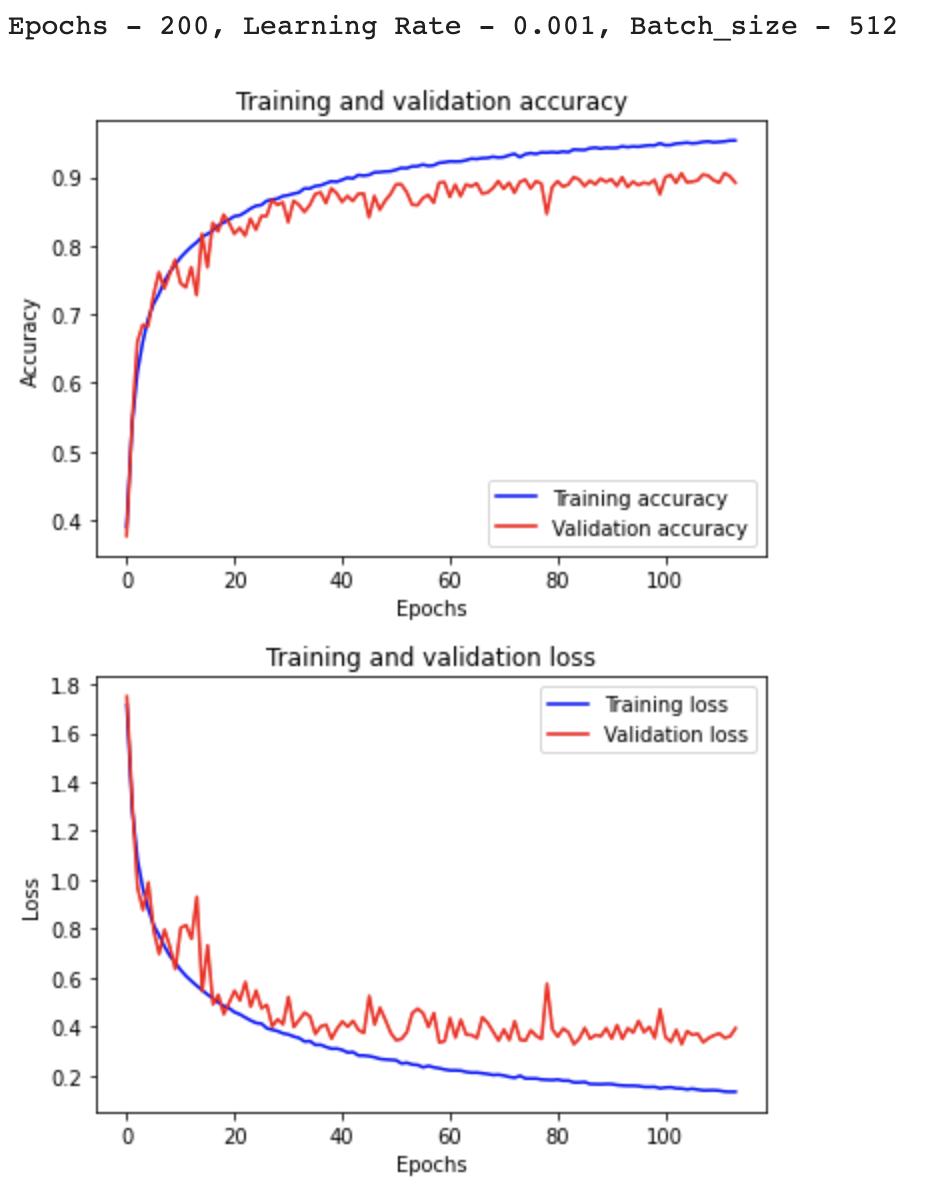






*******************************************************************************

**3. With Normaliztion + ELU + Dropout + Batch Normalization + Data Augmentation + L2-decay**

- Epoch 179/200
97/97 [==============================] - 30s 311ms/step

  **- loss: 0.3260 - accuracy: 0.9359 - val_loss: 0.5216 - val_accuracy: 0.8814**

  Model took time for training : 90.83 minutes

  Test loss :  0.521602988243103
  Test accuracy :  0.8813999891281128

[link to image](https://raw.githubusercontent.com/snehalutage/data/master/ELU_final.png)

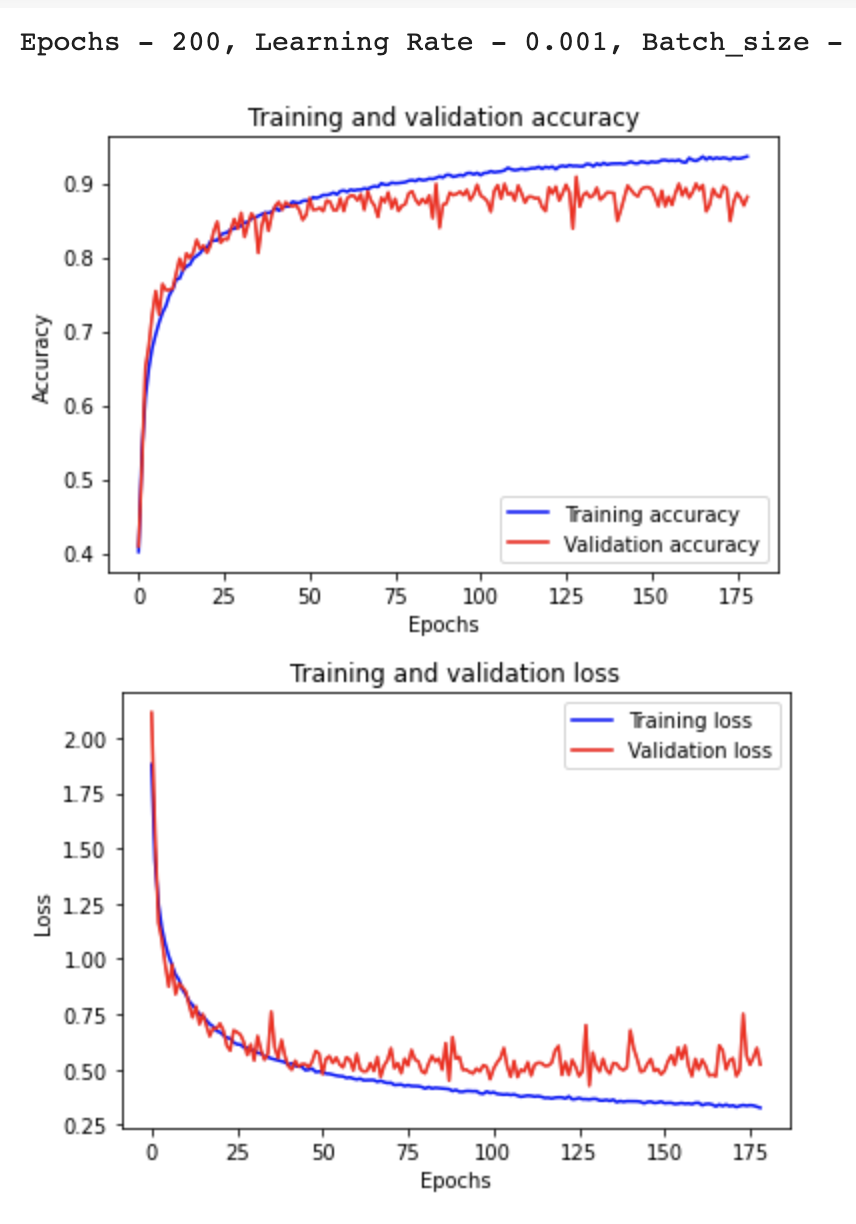
*******************************************************************************

**4. With Normaliztion + ReLU + Dropout + Batch Normalization + Data Augmentation + L2-decay**

- Epoch 147/200
97/97 [==============================] - 30s 314ms/step 

  **- loss: 0.3423 - accuracy: 0.9443 - val_loss: 0.5941 - val_accuracy: 0.8781**

  Model took time for training : 75.44 minutes

  Test loss :  0.594109296798706
  Test accuracy :  0.8780999779701233

  [link to image](https://raw.githubusercontent.com/snehalutage/data/master/ReLU_final.pngs://)

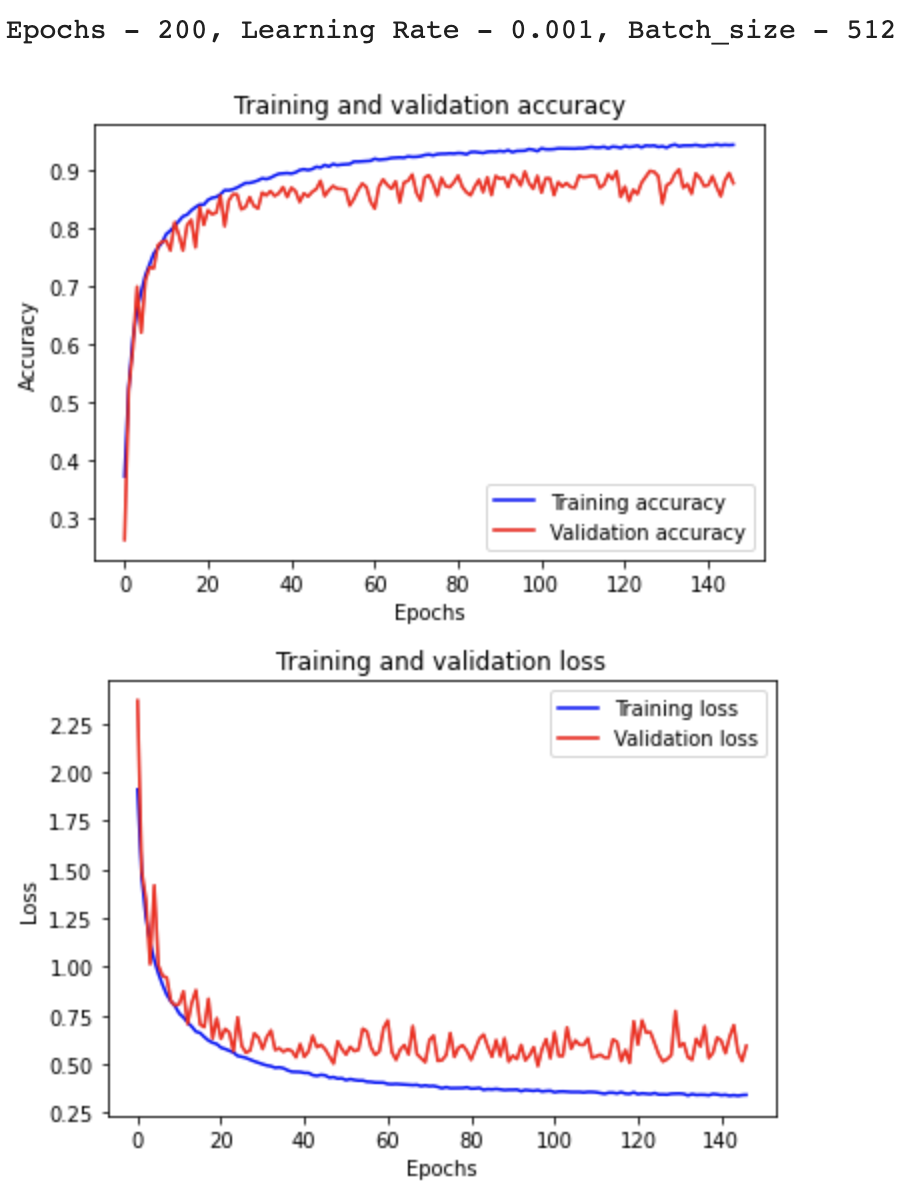





 



---



**REPORT - With different hyperparameters** 

**----------------------------------------------------**

Testing with different Hyperparameters to tune the CNN model to achieve better testing/validation accuracy. ReLU activation function used while checking the impact of parameters.

**1.** **No Normalization No Regularization**

- There is overfitting, the training accuracy is high but the validation/testing accuracy is too low. It shows the model has memorized the training set. Testing accuracy increases at starting epochs but later it remains constant. Loss decreases but increases after few epochs.

  **No Normalization**

  Epoch 20/20
98/98 [==============================] - 8s 86ms/step 

  **- loss: 0.0742 - accuracy: 0.9754 - val_loss: 1.4055 - val_accuracy: 0.7356**

  Model took time for training : 2.87 minutes

  Test loss :  1.4055366516113281
  Test accuracy :  0.7355999946594238

  **Solution** - Normalize the training data, to make the training data in the range 0-1, z-score etc.

  
******************************************************************************


**2.** **With Normalization and No Regularization**

- There is overfitting seen in the plot.
Training accuracy increases while the validation/testing accuracy increases uptil few epochs after that it remains constant and does'nt increase much. It shows overfitting. 

  **With Normalization**

  Epoch 20/20
98/98 [==============================] - 9s 87ms/step 

  **- loss: 0.0498 - accuracy: 0.9831 - val_loss: 1.3757 - val_accuracy: 0.7786**

  Model took time for training : 2.90 minutes

  Test loss :  1.3757129907608032
  Test accuracy :  0.7785999774932861

- The accuracy shows the model has memorized the training data hence the accuracy for training set is high and validation set is less.

- Training loss decreases as number of epochs increases, but the validation loss decreases for few epochs but afterwards loss starts increasing.

- **Solution** - Add regularizations to reduce the overfitting (Dropout/Batch_Normalization /L2 regularizer/Data Augmentation)

******************************************************************************


**3.** **Various Regularization Techniques**

  **a. Dropout**

  It reduces overfitting, thus increasing the training accuracy and testing/validation accuracy. From the plots of accuarcy and the loss we can see that the loss reduces for both training and testing. 
Accuracy for testing increases as compared to previous output without dropouts. Without dropout the Training accuracy - 97% and Testing - 73%.
But with dropout it is improved.

  Epoch 20/20
98/98 [==============================] - 9s 91ms/step 

**- loss: 0.2833 - accuracy: 0.9023 - val_loss: 0.5427 - val_accuracy: 0.8314**

Model took time for training : 3.02 minutes

Test loss :  0.5427187085151672
Test accuracy :  0.8313999772071838 

  **b. L2 Regularizer ,Dropout, Batch Normalization** 

  Reduces the overfitting and improves the accuracy with few percent.

  **- L2 + dropout**

  Epoch 20/20
98/98 [==============================] - 9s 92ms/step 

**- loss: 0.4457 - accuracy: 0.8954 - val_loss: 0.6722 - val_accuracy: 0.8341** 

Model took time for training : 3.04 minutes

Test loss :  0.6722222566604614
Test accuracy :  0.8341000080108643
  
  **- L2 + Batch_regularizer + Dropout**

  Epoch 50/50
196/196 [==============================] - 8s 40ms/step 

**- loss: 0.3025 - accuracy: 0.9339 - val_loss: 0.6021 - val_accuracy: 0.8623**

  Model took time for training : 6.54 minutes

  Test loss :  0.6020755171775818
  Test accuracy :  0.8622999787330627

  **c. Data Augmentation with other regularizations combined**

  Overfitting reduc ed further, training accuracy is improved. With Data Augmentation, the number of training samples are increased and it improves the training accuracy as well as the testing accuracy. But due to Data Augmentation more computation power is required.(With Data aug + Batch Normalization)

  Epoch 175/200
195/195 [==============================] - 24s 125ms/step 

**- loss: 0.2977 - accuracy: 0.8958 - val_loss: 0.3698 - val_accuracy: 0.8810**

Model took time for training : 68.97 minutes

Test loss :  0.36979547142982483
Test accuracy :  0.8809999823570251


******************************************************************************


**4.** **Various Activation Functions - Accuracy for various activation function is already shown in above results section**

  **a. ReLU**
  
  Fast to converge as compared to Sigmoid and gives a good accuracy.
 
  **b. Sigmoid**

  Model takes time to learn due to exponential operation and slower than ReLU.

  **c. LeakyReLU**

  Computationally fast and model learns quickly as compared to ReLU and Sigmoid.

  **d. ELU**

  Accuracy is improved but at the cost of computation.
  
  
******************************************************************************


**5.** **Weight Intialization + Dropout + Batch Normalization + L2 regularization**

Using the Kaming/MSRA weight initialization technique kernel_initializer = "he_uniform" improves the test accuracy with few percent.

**ReLU**

Epoch 50/50
196/196 [==============================] - 6s 32ms/step 

**- loss: 0.3148 - accuracy: 0.9323 - val_loss: 0.6363 - val_accuracy: 0.8537**

Model took time for training : 5.08 minutes

Test loss :  0.6362997889518738
Test accuracy :  0.8536999821662903


**ELU**

Epoch 50/50
196/196 [==============================] - 6s 32ms/step 

**- loss: 0.3198 - accuracy: 0.9251 - val_loss: 0.5805 - val_accuracy: 0.8621**

Model took time for training : 5.15 minutes

Test loss :  0.5804566144943237
Test accuracy :  0.8621000051498413


